In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sympy import *
from sympy.interactive import printing
printing.init_printing(use_latex=True)

In [2]:
import sympy
print(sympy.__version__)

0.7.6.1


In [3]:
Re, Rm, omega0, B0, pi, Q, beta, c1, c2, rho, nu, eta, u0, du0 = symbols("R_e R_m Omega_0 B_0 pi Q beta c_1 c_2 rho nu eta u0 du0", real=True)
psi, u, A, B = symbols("psi u A B")
dt, dr, dz = symbols("d_t d_r d_z")
kr, kz = symbols("k_r k_z") 
r, z, t  = symbols("r, z, t")
sigma = symbols("sigma")

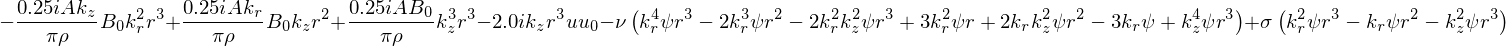

In [4]:
sigma*(-r**3*kz**2*psi + r**3*kr**2*psi - r**2*kr*psi) - r**2*2*r*u0*1j*kz*u + r**3*(1/(4*pi*rho))*B0*1j*kz**3*A + (1.0/(4*pi*rho))*B0*r**2*1j*kz*kr*A - (1.0/(4*pi*rho))*r**3*B0*1j*kz*kr**2*A - nu*(2*r**2*kz**2*kr*psi - 2*r**3*kz**2*kr**2*psi + r**3*kz**4*psi + r**3*kr**4*psi - 3*kr*psi + 3*r*kr**2*psi - 2*r**2*kr**3*psi)

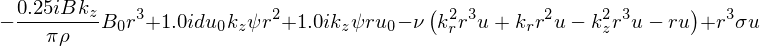

In [5]:
sigma*r**3*u + 1j*kz*r*u0*psi + 1j*kz*r*r*du0*psi - 1j*kz*r**3*(1/(4*pi*rho))*B0*B - nu*(-r**3*kz**2*u + r**3*kr**2*u + r**2*kr*u - r*u)

In [6]:
sigma*r*A - r*B0*1j*kz*psi - eta*(r*kr**2*A - r*kz**2*A - kr*A)

In [7]:
sigma*r**3*B + r*u0*1j*kz*A - r**3*B0*1j*kz*u - 1j*kz*r*r*du0*A - eta*(-r**3*kz**2*B + r**3*kr**2*B + r**2*kr*B - r*B)

In [8]:
LM = Matrix([[sigma*(-r**3*kz**2 + r**3*kr**2 - r**2*kr) - nu*(2*r**2*kz**2*kr - 2*r**3*kz**2*kr**2 + r**3*kz**4 + r**3*kr**4 - 3*kr + 3*r*kr**2 - 2*r**2*kr**3), -r**2*2*r*u0*1j*kz, r**3*(1/(4*pi*rho))*B0*1j*kz**3 + (1.0/(4*pi*rho))*B0*r**2*1j*kz*kr - (1.0/(4*pi*rho))*r**3*B0*1j*kz*kr**2, 0],
             [1j*kz*r*u0 + 1j*kz*r*r*du0, sigma*r**3 - nu*(-r**3*kz**2 + r**3*kr**2 + r**2*kr - r), 0, - 1j*kz*r**3*(1/(4*pi*rho))*B0],
             [-r*B0*1j*kz, 0, sigma*r - eta*(r*kr**2 - r*kz**2 - kr), 0],
             [0, -r**3*B0*1j*kz, r*u0*1j*kz - 1j*kz*r*r*du0, sigma*r**3 - eta*(-r**3*kz**2 + r**3*kr**2 + r**2*kr - r)]])

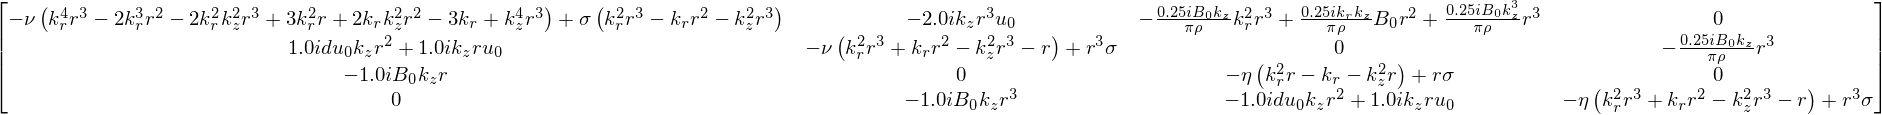

In [9]:
LM

$u_0 = c1 r + B/r$

$\partial_r u_0 = c1 - c2/r^2$

In [10]:
LM = LM.subs(u0, (r*c1 + c2/r))
LM = LM.subs(du0, (c1 - c2/r**2))

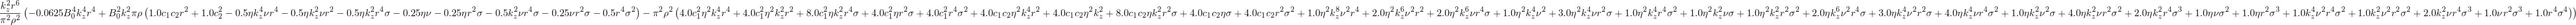

In [11]:
((LM.subs(kr, 0)).det()).simplify()

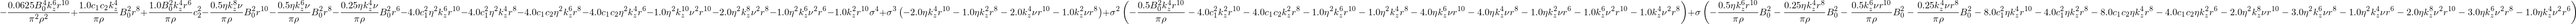

In [12]:
collect((LM.subs(kr, 0)).det(), sigma)

In [13]:
disp = LM.det()

In [19]:
func = lambdify((kr, nu, eta, r, rho, pi, B0, c1, c2), disp)

nu = 3.26e-3 $cm^2/s$

eta = 2000 $cm^2/s$

rho = 6 $g/cm^3$

B0 = 3000 G

In [29]:
r_in = 5. # cm
r_out = 3*r_in
h = 10. # cm
d = r_out - r_in
eps = h/d
K = np.pi/h * np.sqrt(1+eps**2)
Omega_in = 314 # rad/s
Omega_out = 37.9 # rad/s
nugj = 3.26e-3 # cm^2/s
Re_in = Omega_in/(nugj*K**2)
Re_out = Omega_out/(nugj*K**2)

c2gj = (Omega_out - Omega_in)/(1/r_out**2 - 1/r_in**2)
c1gj = Omega_in - c2gj/r_in**2

goodmanjiparams = func(0, 3.26E-3, 2000, 10.0, 6, np.pi, 3000, c1gj, c2gj)

In [30]:
goodmanjibykz = lambdify(kz, goodmanjiparams)

In [79]:
print(goodmanjiparams)
print(goodmanjibykz(0.314))

-425104000000.0*k_z**10 - 260800425104000.0*k_z**8*sigma - 1.55653619364674e+16*k_z**8 - 4.00002608001063e+16*k_z**6*sigma**2 - 4.77465998743995e+18*k_z**6*sigma - 1.86407088900614e+20*k_z**6 - 40000065200000.0*k_z**4*sigma**3 - 2.78732675437949e+15*k_z**4*sigma**2 - 6.7797312167189e+16*k_z**4*sigma + 2.96078966350234e+19*k_z**4 - 10000000000.0*k_z**2*sigma**4 - 200000326000.0*k_z**2*sigma**3 - 10981011207500.0*k_z**2*sigma**2 - 219620093749999.0*k_z**2*sigma
-985960000.0*sigma**4 - 408566714602.659*sigma**3 - 66517758252496.8*sigma**2 - 5.25710924859983e+15*sigma + 1.09156620576739e+17


In [28]:
c2gj

In [62]:
vertical_wavenumbers = np.arange(0.05, 2, 0.05)
out1 = np.zeros((len(vertical_wavenumbers), 4), np.complex) # four roots
for i in range(len(vertical_wavenumbers)):
    hh1 = solve(goodmanjibykz(vertical_wavenumbers[i]))
    out1[i, 0] = hh1[0]
    out1[i, 1] = hh1[1]
    out1[i, 2] = hh1[2]
    out1[i, 3] = hh1[3]

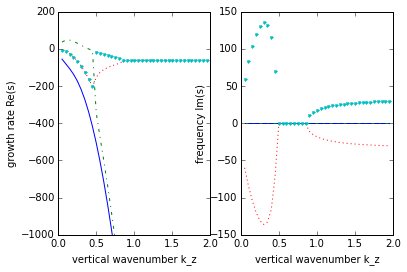

In [63]:
plt.figure()
ax = plt.subplot(121)
ax.plot(vertical_wavenumbers, out1[:, 0].real)
ax.plot(vertical_wavenumbers, out1[:, 1].real, '-.')
ax.plot(vertical_wavenumbers, out1[:, 2].real, ':')
ax.plot(vertical_wavenumbers, out1[:, 3].real, '.')
ax.set_ylim(-1000, 200)

ax.set_xlabel('vertical wavenumber k_z')
ax.set_ylabel('growth rate Re(s)')

ax = plt.subplot(122)
ax.plot(vertical_wavenumbers, out1[:, 0].imag)
ax.plot(vertical_wavenumbers, out1[:, 1].imag, '-.')
ax.plot(vertical_wavenumbers, out1[:, 2].imag, ':')
ax.plot(vertical_wavenumbers, out1[:, 3].imag, '.')

ax.set_xlabel('vertical wavenumber k_z')
ax.set_ylabel('frequency Im(s)')

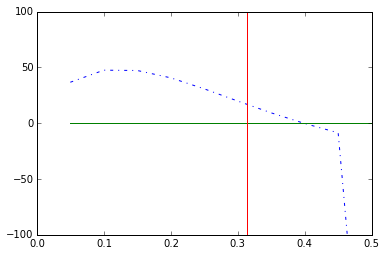

In [64]:
plt.figure()
plt.plot(vertical_wavenumbers, out1[:, 1].real, '-.')
plt.ylim(-100, 100)
plt.xlim(0.0, 0.5)
plt.plot(vertical_wavenumbers, np.zeros(len(vertical_wavenumbers)))
plt.plot(np.ones(len(vertical_wavenumbers))*np.pi/10, np.linspace(-500, 200, len(vertical_wavenumbers)))

In [65]:
func_nu_eta = lambdify((kr, sigma, r, rho, pi, B0, c1, c2), disp)

In [67]:
goodmanjiparams_criticalkz = func_nu_eta(0, 0, 10.0, 6, np.pi, 3000, c1gj, c2gj)

In [87]:
#nu = 3.26e-3  cm2/scm2/s 
#eta = 2000  cm2/scm2/s 
nu_sweep = np.arange(3.0E-3, 3.5E-3, 0.05E-4)
eta_sweep = np.arange(1500, 2500, 10)
len(nu_sweep), len(eta_sweep)

goodmanjibykz = lambdify((nu, eta), goodmanjiparams_criticalkz)
print solve(goodmanjibykz(2, 2))#3.26e-3, 2000))

[-0.459215850342966, 0.0, 0.459215850342966, -0.234562653448389 - 172.747568113034*I, -0.234562653448389 + 172.747568113034*I, 0.234562653448389 - 172.747568113034*I, 0.234562653448389 + 172.747568113034*I]


In [ ]:
%%time

nu_eta_space = np.zeros((len(nu_sweep), len(eta_sweep), 7), np.complex)
for i in range(len(nu_sweep)):
    for j in range(len(eta_sweep)):
        hh1 = solve(goodmanjibykz(nu_sweep[i], eta_sweep[j]))
        nu_eta_space[i, j, 0] = hh1[0]
        nu_eta_space[i, j, 1] = hh1[1]
        nu_eta_space[i, j, 2] = hh1[2]
        nu_eta_space[i, j, 3] = hh1[3]
        nu_eta_space[i, j, 4] = hh1[4]
        nu_eta_space[i, j, 5] = hh1[5]
        nu_eta_space[i, j, 6] = hh1[6]
        print("nu, eta", i, j)
        